In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import OLS

setoption = pd.set_option('display.max_columns', None)

# Import

In [17]:
# file imports
file_path = '../data/processed/forecasts_pmafe_v2.csv'

# Import marius_eda data
df = pd.read_csv(file_path)

In [18]:
df.head()

,Unnamed: 0,ibes_ticker_pk,official_ticker,company_name,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_horizon,mean_forecast_horizon_days,afe_analyst_i,afe_analyst_ijt_mean,afe_firm_jt_mean,pmafe,analyst_count
0,26,0000,TLMR,TALMER BANCORP,258,8675,0.89,2015-12-31,2015-12-23,2015-10-30,1.02,2016-01-26,62 days,112,0.13,0.146667,0.166786,-0.120628,28
1,23,0000,TLMR,TALMER BANCORP,1267,71182,0.90,2015-12-31,2015-11-10,2015-10-29,1.02,2016-01-26,63 days,181,0.12,0.158000,0.166786,-0.052677,28
2,25,0000,TLMR,TALMER BANCORP,2500,72481,0.86,2015-12-31,2015-10-30,2015-10-30,1.02,2016-01-26,62 days,173,0.16,0.198000,0.166786,0.187152,28
3,20,0000,TLMR,TALMER BANCORP,873,79092,0.89,2015-12-31,2015-11-05,2015-09-28,1.02,2016-01-26,94 days,171,0.13,0.136667,0.166786,-0.180585,28
4,24,0000,TLMR,TALMER BANCORP,228,80474,0.89,2015-12-31,2015-12-08,2015-10-29,1.02,2016-01-26,63 days,148,0.13,0.164000,0.166786,-0.016702,28


In [19]:
df.shape

(328831, 19)

# Descriptive Charts 
Hypotheses:

1. Hypothesis: Covid had an impact on analysts forecast accuarcy
2. Hypothesis: The analyst accuarcy increases, the closer the annouce date of the firm
3. Hypothesis: Analysts working at the biggest 10 % brokers by analyst count has a positive impact on PMAFE
4. Hypothesis: Analysts forecast accuarcy decreases with the number of industries followed

In [35]:
# whats row has the top 10 maxiimum of the afe_analyst_i
guck = df.nlargest(1000, 'afe_analyst_i')
guck

,Unnamed: 0,ibes_ticker_pk,official_ticker,company_name,estimator,analyst,estimated_eps,fiscal_period_ending,revision_date,announce_date,actual_eps,announce_date_actual,forecast_horizon,mean_forecast_horizon_days,afe_analyst_i,afe_analyst_ijt_mean,afe_firm_jt_mean,pmafe,analyst_count,year
283470,1191131,SYRX,SYRX,SYSOREX GLOBAL,954,77381,-8505000.00,2016-12-31,2016-03-10,2016-03-10,-30132000.00,2017-04-17,296 days,296,21627000.00,2.162700e+07,1.471667e+07,0.469558,8,2016
122218,509282,ETRM,ETRM,ENTEROMEDICS INC,2342,107358,-92610000.00,2015-12-31,2015-12-17,2015-02-18,-75322800.00,2016-02-17,316 days,316,17287200.00,1.728720e+07,7.245000e+06,1.386087,14,2015
122220,509290,ETRM,ETRM,ENTEROMEDICS INC,3724,109069,-79380000.00,2015-12-31,2015-08-17,2015-08-07,-75322800.00,2016-02-17,146 days,215,4057200.00,7.114800e+06,7.245000e+06,-0.017971,14,2015
122222,509292,ETRM,ETRM,ENTEROMEDICS INC,2223,143682,-79380000.00,2015-12-31,2015-11-10,2015-11-10,-75322800.00,2016-02-17,51 days,165,4057200.00,4.057200e+06,7.245000e+06,-0.440000,14,2015
283469,1191128,SYRX,SYRX,SYSOREX GLOBAL,954,77381,-27337500.00,2015-12-31,2015-11-16,2015-11-05,-30375000.00,2016-03-10,56 days,185,3037500.00,6.986250e+06,3.915000e+06,0.784483,9,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226817,947210,ORIG,ORIG,OCEAN RIG UDW,714,187036,276.00,2017-12-31,2017-04-25,2017-04-25,8.98,2018-02-20,250 days,273,267.02,2.300000e+02,1.241166e+04,-0.981469,11,2017
28159,108079,ACRD,ACOR,ACORDA,2628,55673,-472.80,2019-12-31,2019-10-18,2019-08-02,-206.40,2020-02-13,151 days,235,266.40,3.438000e+02,2.533343e+02,0.357100,42,2019
117471,489254,ENIC,ENIC,ENEL CHILE,3534,54118,326.61,2021-12-31,2022-03-02,2021-05-05,61.50,2022-02-28,240 days,272,265.11,3.355350e+02,2.062284e+02,0.627007,7,2021
30222,115670,ADXS,ADXS,ADVAXIS INC,142,153151,-2232.00,2016-10-31,2016-10-24,2016-04-07,-2496.00,2017-01-09,207 days,207,264.00,2.640000e+02,4.430769e+02,-0.404167,13,2016


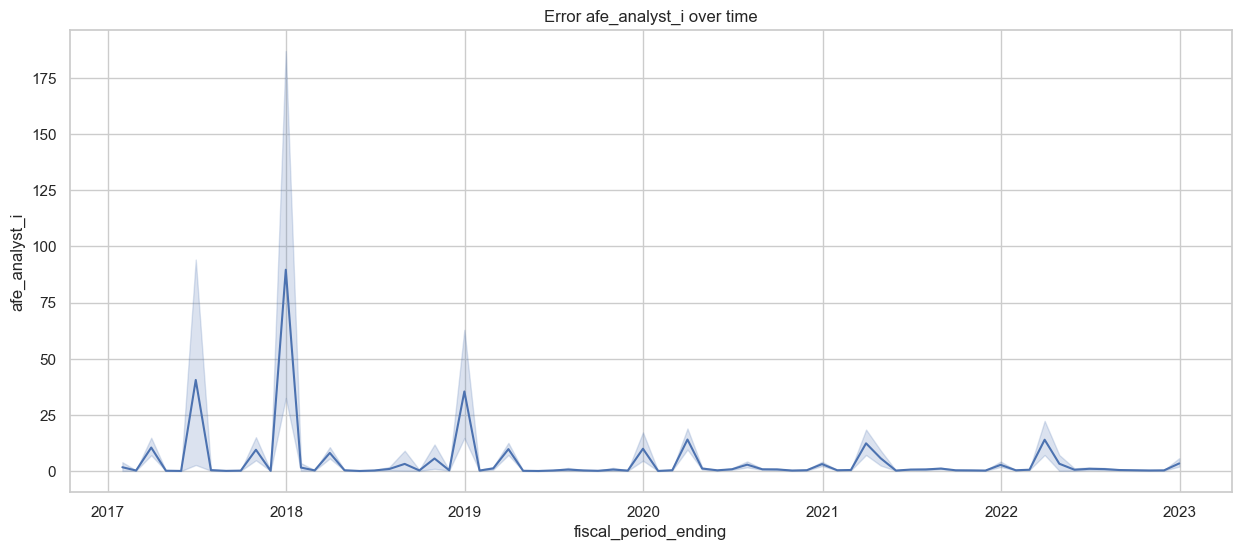

In [37]:
# plot the error afe_analyst_ijt_mean over time for the fiscal_periods_ending

# extract year from fiscal_period_ending
df['fiscal_period_ending'] = pd.to_datetime(df['fiscal_period_ending'])
df['year'] = df['fiscal_period_ending'].dt.year

# line plot the error afe_analyst_ijt_mean over time for the fiscal_periods_ending between 2017 and 2022
df = df[(df['year'] >= 2017) & (df['year'] <= 2022)]
df = df.sort_values('fiscal_period_ending')

plt.figure(figsize=(15, 6))
sns.lineplot(x='fiscal_period_ending', y='afe_analyst_i', data=df)
plt.title('Error afe_analyst_i over time')
plt.show()



# Linear Regression

In [20]:
df["pmafe"].isna().sum()

0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328831 entries, 0 to 328830
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  328831 non-null  int64  
 1   ibes_ticker_pk              328831 non-null  object 
 2   official_ticker             327649 non-null  object 
 3   company_name                327653 non-null  object 
 4   estimator                   328831 non-null  int64  
 5   analyst                     328831 non-null  int64  
 6   estimated_eps               328831 non-null  float64
 7   fiscal_period_ending        328831 non-null  object 
 8   revision_date               328831 non-null  object 
 9   announce_date               328831 non-null  object 
 10  actual_eps                  328831 non-null  float64
 11  announce_date_actual        328831 non-null  object 
 12  forecast_horizon            328831 non-null  object 
 13  mean_forecast_

In [23]:
df["mean_forecast_horizon_days"] = df["mean_forecast_horizon_days"].astype(int)

Fixed effects

In [25]:
# Perform mean aggregation
subset_df = df[["analyst", "estimator", "mean_forecast_horizon_days", "pmafe", "analyst_count"]]
mean_df = subset_df.groupby("analyst").mean()
demeaned_df = subset_df.set_index("analyst") - mean_df

In [26]:
print(OLS(demeaned_df['pmafe'], demeaned_df[['estimator', "mean_forecast_horizon_days", "analyst_count"]]).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                  pmafe   R-squared (uncentered):                   0.031
Model:                            OLS   Adj. R-squared (uncentered):              0.031
Method:                 Least Squares   F-statistic:                              3551.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):                        0.00
Time:                        16:43:45   Log-Likelihood:                     -3.2168e+05
No. Observations:              328831   AIC:                                  6.434e+05
Df Residuals:                  328828   BIC:                                  6.434e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

# EDA

## Broker size

In [3]:
# count of distinct estimator (broker)
estimators = df['estimator'].nunique()
estimators

658

In [4]:
# count the number of analysts of estimator 1267
analyst_count = df[df['estimator'] == 1267]['analyst'].nunique()
analyst_count

211

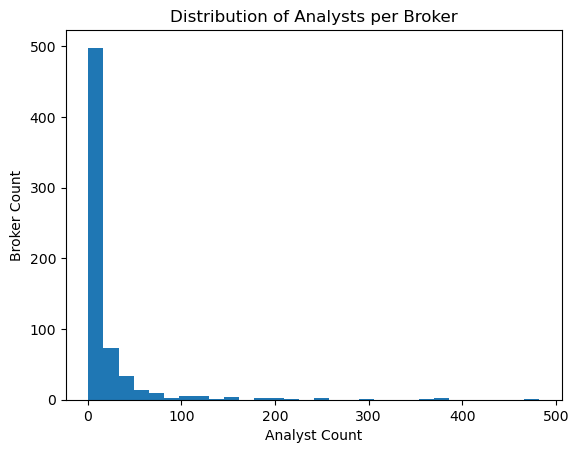

In [13]:
# plot the distribution of the count of analysts at each broker
analyst_count_dist = df.groupby('estimator')['analyst'].nunique().reset_index()

# plot histogram
plt.hist(analyst_count_dist['analyst'], bins=30)
plt.title('Distribution of Analysts per Broker')
plt.xlabel('Analyst Count')
plt.ylabel('Broker Count')
plt.show()


In [15]:
df['announce_year'] = pd.to_datetime(df['announce_date']).dt.year

# group by broker with more than 1000, more than 2500 and more than 5000 analysts per year
count_100 = df.groupby(['estimator', 'announce_year']).size().reset_index(name='count').sort_values(by='count', ascending=False).query('count > 100').shape[0]
count_75 = df.groupby(['estimator', 'announce_year']).size().reset_index(name='count').sort_values(by='count', ascending=False).query('count > 75').shape[0]
count_50 = df.groupby(['estimator', 'announce_year']).size().reset_index(name='count').sort_values(by='count', ascending=False).query('count > 50').shape[0]

print(count_100)
print(count_75)
print(count_50)

639
719
889


In [39]:
df.groupby(['estimator', 'announce_year']).size()

estimator  announce_year
11         2015             1064
           2016             1292
           2017             1304
           2018             1423
           2019             1422
                            ... 
4554       2022                2
4555       2022                1
4560       2022                1
4562       2022                1
4566       2022                2
Length: 3515, dtype: int64

c:\Users\mariu\mambaforge\envs\learn-env\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


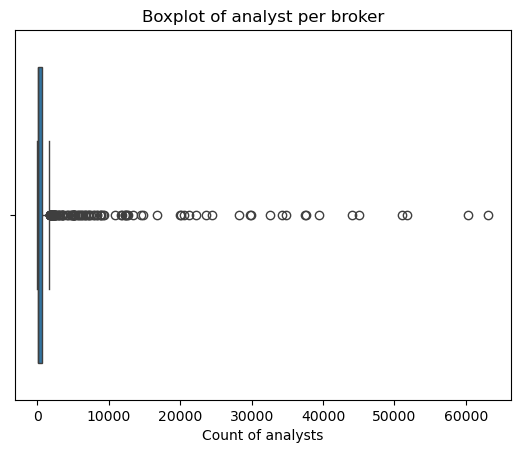

count      671.000000
mean      2049.554396
std       6881.741629
min          1.000000
25%         16.000000
50%         92.000000
75%        699.500000
max      63137.000000
Name: count, dtype: float64


In [8]:
# boxplot of analyst per broker
sns.boxplot(x=df['estimator'].value_counts())
plt.title('Boxplot of analyst per broker')
plt.xlabel('Count of analysts')
plt.show()
print(df['estimator'].value_counts().describe())

## Analysts

In [9]:
# number of disinct analysts
analysts = df['analyst'].nunique()
analysts

10237

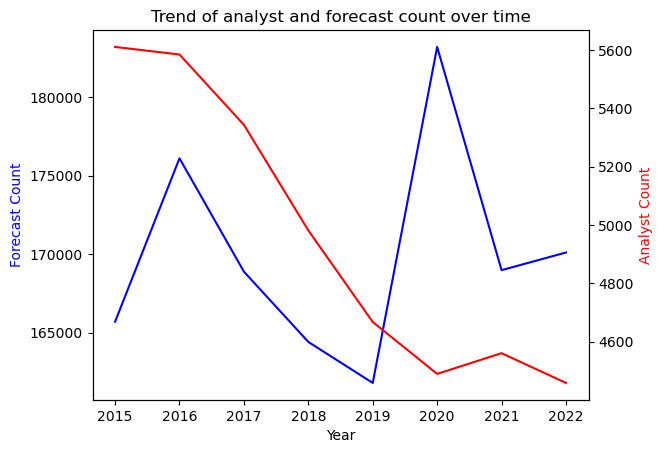

In [23]:
df['fiscal_period_ending'] = pd.to_datetime(df['fiscal_period_ending'])
df['announce_year'] = df['fiscal_period_ending'].dt.year 
df = df[(df['announce_year'] >= 2014) & (df['announce_year'] <= 2022)]

# sum of forecasts over all analyst per year
forecast_count = df.groupby('announce_year')['analyst'].count()
analyst_count = df.groupby('announce_year')['analyst'].nunique()

fig, ax1 = plt.subplots()
ax1.plot(forecast_count.index, forecast_count.values, color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Forecast Count', color='blue')

# Create a second axis
ax2 = ax1.twinx()

# Plot the analyst count on the second axis
ax2.plot(analyst_count.index, analyst_count.values, color='red')
ax2.set_ylabel('Analyst Count', color='red')

plt.title('Trend of analyst and forecast count over time')
plt.show()


# Coverage